In [ ]:
## Observations from the data
## Three Observations

#1.	Of the four regimens that were focused on (Capomulin, Ramicane, Infubinol, and Ceftamin), the data show that Capomulin and Ramicane are the most effective treatments with Ramicane showing slightly more promising results.
#2.	From the line plot for mouse s185 for Capomulin, tumor volume reduced dramatically.  Conversely, plugging in other mice on other treatments, outside of Ramicine, showed tumor growth (including the placebo).
#3.	The data also show that the average tumor volume is strongly correlated with higher mouse weight as heavier mice showed greater average tumor volume.  This is also supported by a correlation value of .84 as well as an r-squared value of .7088


In [1]:
%matplotlib inline

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#mouse_data_combined_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])
mouse_data_combined_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview
mouse_data_combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [57]:
# Checking the number of mice.
mouse_data_combined_df.nunique()

Mouse ID               249
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
dtype: int64

In [58]:
mouse_data_combined_df.shape

(1893, 8)

In [59]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = mouse_data_combined_df[mouse_data_combined_df.duplicated()]
duplicate_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [60]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = mouse_data_combined_df[(mouse_data_combined_df["Mouse ID"] == "g989")]
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [61]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_df = mouse_data_combined_df[mouse_data_combined_df["Mouse ID"] != "g989"]
mouse_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [62]:
# Checking the number of mice in the clean DataFrame.
mouse_data_df.nunique()

Mouse ID               248
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
dtype: int64

In [63]:
# Number of mice after removal of duplicates
mouse_data_df.shape

(1880, 8)

In [64]:
# Number of mice before removal of duplicates
mouse_data_combined_df.shape

(1893, 8)

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [65]:
# Calculate Tumor Volume Summary Statistics Using GroupBy
tumor_volume_mean = mouse_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_volume_median = mouse_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_variance = mouse_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_std_dev = mouse_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_sem = mouse_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [66]:
## SUMMARY STATISTICS (GROUPBY)
mouse_data_summary_df = pd.DataFrame({"Tumor Volume Mean": tumor_volume_mean, "Tumor Volume Median": tumor_volume_median,
                                    "Tumor Volume Variance": tumor_volume_variance, "Tumor Volume Std. Dev": tumor_volume_std_dev,
                                    "Tumor Volume SEM": tumor_volume_sem
})
mouse_data_summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [67]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

mouse_data_agg_df = mouse_data_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
mouse_data_agg_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [16]:
## BAR and PIE CHARTS

In [68]:
mouse_data_df.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

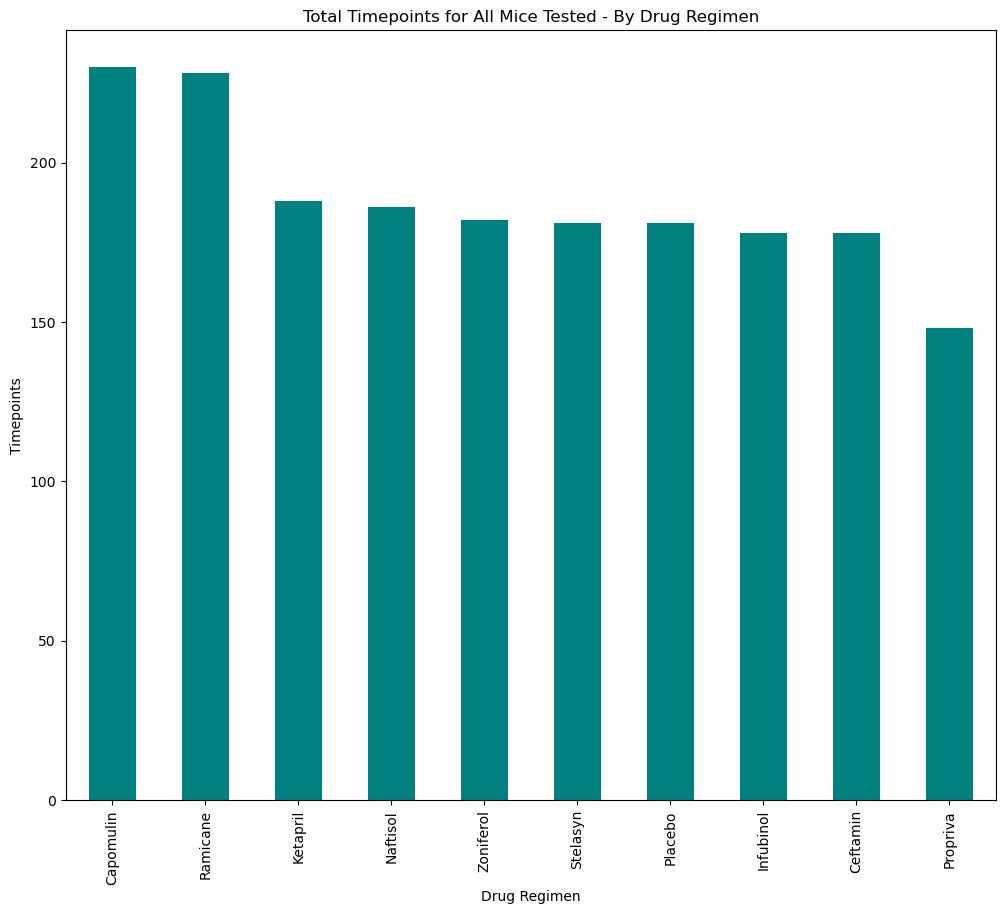

In [69]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Get Drug Regimens
%matplotlib inline
drug_regimen_data_df = mouse_data_df["Drug Regimen"].value_counts()
drug_regimen_data_df.plot(kind="bar", facecolor="teal", figsize=(12,10),
                                title="Total Timepoints for All Mice Tested - By Drug Regimen",
                                xlabel="Drug Regimen",
                                ylabel="Timepoints"
)                               
plt.show()

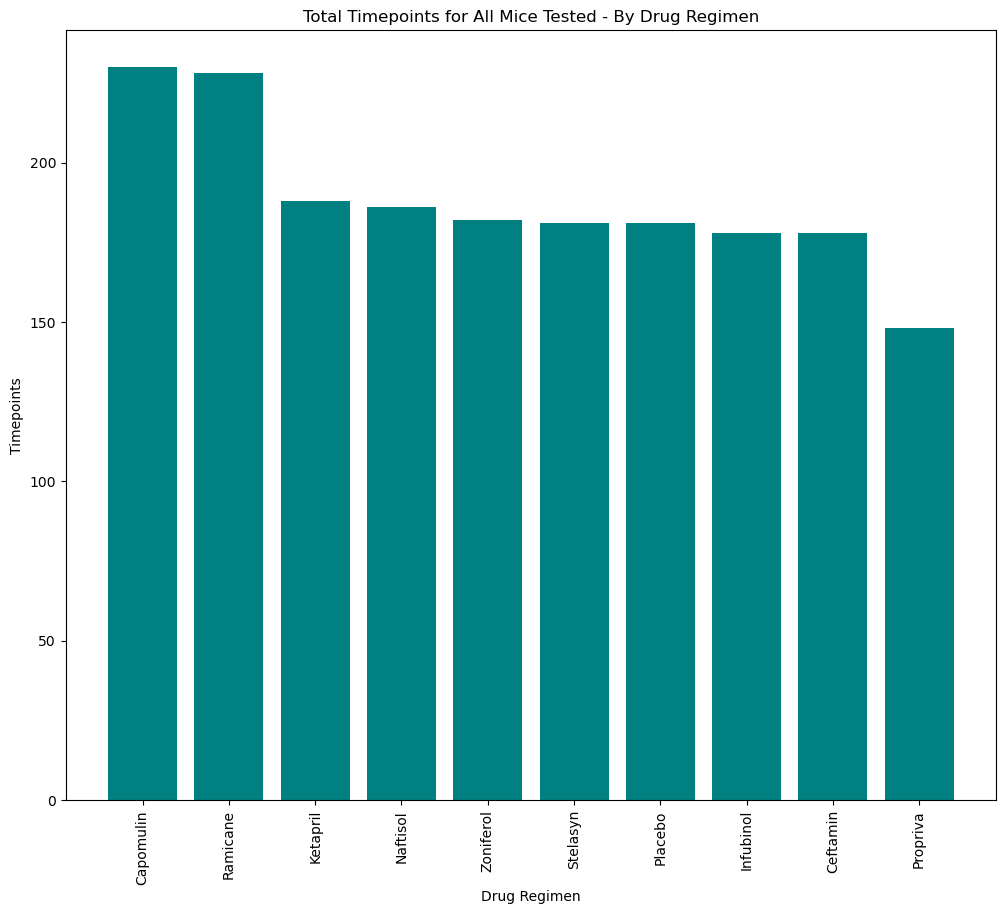

In [70]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
%matplotlib inline
drug_regimen_data = mouse_data_df["Drug Regimen"].value_counts()
fig = plt.figure(figsize=(12,10))
plt.bar(drug_regimen_data.index.values, drug_regimen_data.values, color="teal")
plt.xticks(rotation="vertical")
plt.title("Total Timepoints for All Mice Tested - By Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")

plt.show()

<AxesSubplot:ylabel='Sex'>

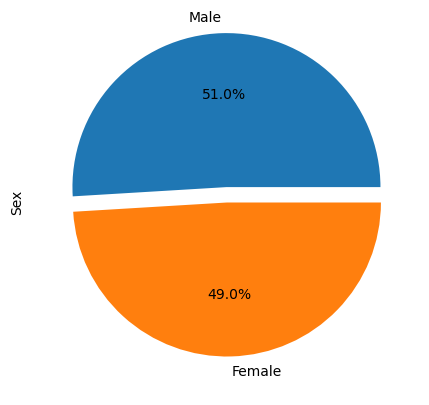

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
import matplotlib.pyplot as plt
%matplotlib inline
male_female = mouse_data_df["Sex"].value_counts()
explode = (0.1, 0)
male_female.plot(kind="pie", figsize=(10,5), explode=explode, autopct="%1.1f%%")

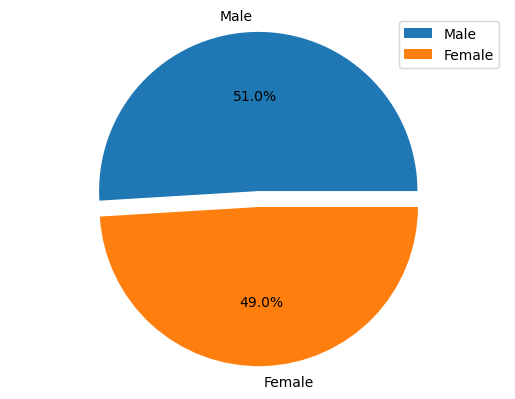

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
%matplotlib inline
male_female = mouse_data_df["Sex"].value_counts()
male_female_labels = ["Male", "Female"]
explode = (0.1, 0)
plt.pie(male_female, labels = male_female_labels, explode=explode, autopct="%1.1f%%")
plt.legend()
plt.axis("equal")
plt.show()

In [73]:
## QUARTILES, OUTLIERS AND BOXPLOTS
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = mouse_data_df.groupby(["Mouse ID"])["Timepoint"].max()
max_timepoint = max_timepoint.reset_index()
max_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_df = pd.merge(max_timepoint, mouse_data_df, on=["Mouse ID", "Timepoint"], how="left")
last_timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [76]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_data = [] 
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for mouse_drugs in regimens:
    tumor_volume = last_timepoint_df.loc[last_timepoint_df["Drug Regimen"] == mouse_drugs, "Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_volume)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volume.quantile([.25, .5, .75])
    lower_quartiles = quartiles[0.25]
    upper_quartiles = quartiles[0.75]
    iqr = upper_quartiles-lower_quartiles
    
    # Determine outliers using upper and lower bounds
    outlier_lower_bounds = lower_quartiles - (1.5 * iqr)
    outlier_upper_bounds = upper_quartiles - (1.5 * iqr)
    print(f"{mouse_drugs}: Values below {outlier_lower_bounds} or above {outlier_upper_bounds} could be outliers")
    

Capomulin: Values below 20.70456164999999 or above 28.486425109999995 could be outliers
Ramicane: Values below 17.912664470000003 or above 27.01120119 could be outliers
Infubinol: Values below 36.83290494999999 or above 48.310040109999996 could be outliers
Ceftamin: Values below 25.355449580000002 or above 40.93320176 could be outliers


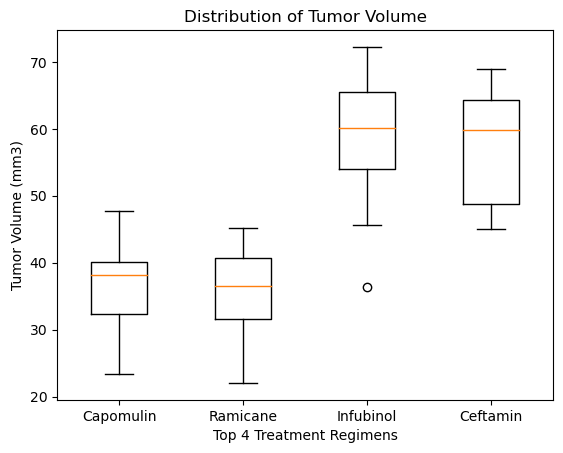

In [79]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
%matplotlib inline
plt.boxplot(tumor_vol_data, labels=regimens)
plt.title("Distribution of Tumor Volume")
plt.xlabel("Top 4 Treatment Regimens")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [25]:
# LINE AND SCATTER PLOTS

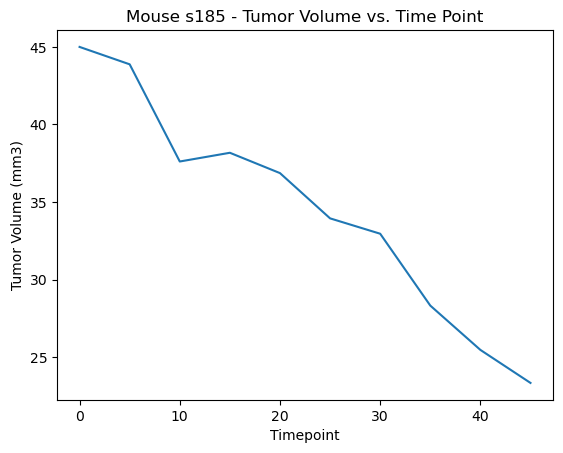

In [91]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
%matplotlib inline
capomulin_mouse = mouse_data_df.loc[mouse_data_df["Mouse ID"] == "s185"]
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])
plt.title("Mouse s185 - Tumor Volume vs. Time Point")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

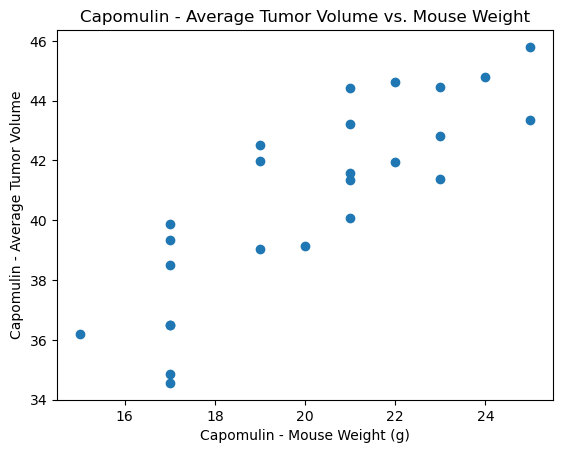

In [81]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
%matplotlib inline
capomulin_mouse_weight = mouse_data_df.loc[mouse_data_df["Drug Regimen"] == "Capomulin"]
cap_avg_tumor_vol = capomulin_mouse_weight.groupby(["Mouse ID"]).mean()
plt.scatter(cap_avg_tumor_vol["Weight (g)"], cap_avg_tumor_vol["Tumor Volume (mm3)"])
plt.title("Capomulin - Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Capomulin - Mouse Weight (g)")
plt.ylabel("Capomulin - Average Tumor Volume") 
plt.show()

In [28]:
# CORRELATION AND REGRESSION
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [82]:
# Correlation Coefficient
%matplotlib inline
capomulin_correlation = mouse_data_df.loc[mouse_data_df["Drug Regimen"] == "Capomulin"]
cap_avg_tumor_vol = capomulin_correlation.groupby(["Mouse ID"]).mean()
correlation = st.pearsonr(cap_avg_tumor_vol["Weight (g)"], cap_avg_tumor_vol["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and average tumor volume is is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume is is 0.84


The r-squared is: 0.7088568047708723


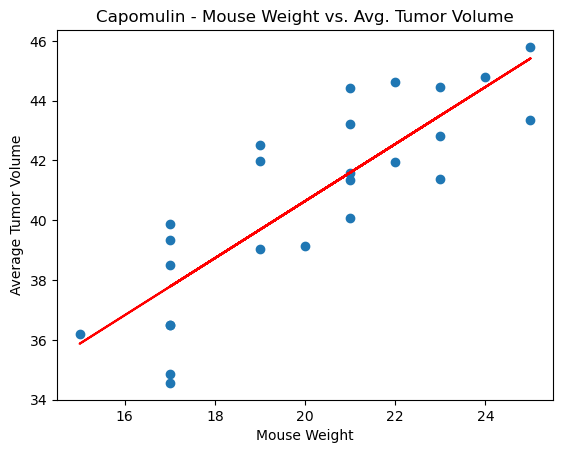

In [83]:
# Linear regression model
%matplotlib inline
x_values = cap_avg_tumor_vol["Weight (g)"]
y_values = cap_avg_tumor_vol["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) 
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.title("Capomulin - Mouse Weight vs. Avg. Tumor Volume")
print(f"The r-squared is: {rvalue**2}")
plt.show()